# Introduction

Here in this tutorial, we will create a very simple Python application that can be really useful in various business cases. It will be a simple application, because user can use it through the command prompt window. If you are not looking for fancy GUIs, you can construct your easy-peasy Python application right away and it can make your life a lot easier. You can give up preparing the same analysis over and over again, with different input parameters and save a great deal of your efforts in the long run.

I will rely on a single example throughout the tutorial and before diving deeper into it, I would like to talk about a business scenario where we need a simple currency exchange rate analysis to get things going with our daily operations at work.

Suppose, I am interested in getting an idea of where €/$ exchange rate can move in some future and I would like to simulate it daily using Geometric Brownian Motion(GBM). At the end, I can calculate my risk due to currency movements. So, what I need to do is the following.

1. Decide how far to go back in the past and get €/$ rate to calculate daily volatility to be used in GBM algorithm,
2. Decide how far into the future our simulations should go,
3. Decide how many different future scenarios we would like to have,
4. (optional) If I want to try different scenarios based on some daily volatility assumptions other than the historical one, I should be able to enter a daily volatility value manually

Above four decisions are input to our simulation algorithm and we want users to be able to appropriately provide them to our program and get the results. In our case, we have two output files:

1. Number of scenarios(supplied by the user) many simulated forward €/$ rates as xlsx, and
2. Line graph of the simulated rates over all the scenarios as png

In order to make this a stand-alone desktop application, first, we need to create a virtual python environment and install all the required packages that our program uses. Then, we can write the script, but the important thing here is to set our Desktop path(or a folder in Desktop) as the working directory in our code. So, all the operations take place on our Desktop or a user-created folder on Desktop, and the user can have access to the output files.

Below, you can see the steps we will follow in the tutorial.

# Steps

1. Creating virtual python environment
2. Installing packages to the virtual environment
3. Creating the script  
    3.1. Setting Desktop folder as the working directory  
    3.2. Getting input from the user  
    3.3. Retrieving exchange rate data from Quandl  
    3.4. GBM Algorithm  
    3.5. Plotting the simulated rates and creating .png  
    3.6. Writing the scenarios into .xlsx using xlsxwriter  
    3.7. Collecting the output files into a folder  
    3.8. Re-initiating the program  
4. Creating a shortcut on Desktop for the app  
5. Example run  
6. (Bonus) Adding kernel to Jupyter notebook

## 1. Creating virtual python environment

Virtual environments are great for managing python versions, packages and dependencies. You can customize a specific environment for a specific project and you avoid any version & dependency problems. Using a single python environment to build many models may not be good practice since different projects may require different packages with different versions and updating a package may corrupt your other models causing things to get out of your control. Depending on this motivation, we may create model or project specific virtual environments and  therefore, we want our script to use default & installed packages from the virtual environment we want. In the later sections of this tutorial, we will explore in more detail how to change the python interpreter that our scripts use.  

Before creating the virtual environment, you have to make sure that you have a working Python installation and it is in the Path. You can download it from https://www.python.org/downloads/ and during the installation you can add python to the Path variable by checking the appropriate box on the installation screen when it appears (I believe it is the first screen). If you have a python installation, but it is not in the path, you can add it by:
- Control Panel -> System and Security -> System -> Advanced System Settings -> "Environment Variables" (under "Advanced" tab) -> Select "Path" variable under "System variables" box -> Click "Edit" -> Click "New"  
You need to copy and paste two directories:
1. path_to_python\Python37 -> You can edit this with where your Python is installed
2. path_to_python\Python37\Scripts  

![path_var_2.PNG](path_var_2.PNG)

Then, python gets in the Path and we are ready to create a virtual environment.

Now, we need to create an empty folder to host our virtual environment. For this tutorial, I create a folder named PythonVEnvs on the desktop and inside it, I create another folder named Python_VEnv_FXsimulator (You can create it anywhere on your computer as long as you have access permission). We can create the virtual environment that is specific to our application, inside Python_VEnv_FXsimulator. For other projects, we can just create other folders and dump virtual environments into them.  

Open a command prompt window and type:  
python -m venv path_to_python_environment  
You can find the documentation on https://docs.python.org/3/library/venv.html

![venv_cmd_2.PNG](venv_cmd_2.PNG)

Then, we have a clean virtual environment. Next task is to install required packages.  

![venv_folder_2.PNG](venv_folder_2.PNG)

## 2. Installing packages to the virtual environment

In this tutorial, we need below packages:  
1. pandas  
2. numpy  
3. matplotlib  -> to plot scenarios against forward dates  
4. xlsxwriter  -> to write exchange rates for scenarios into Excel  
5. datetime  
6. quandl      -> to retrieve exchange rates through quandl python api

In order to install these packages into our newly created virtual environment, we should open the command prompt window in Scripts folder of the directory where we set up the virtual environment (or we can open the command prompt and move to the Scripts folder using cd command). In my case, the directory is:  
  
C:\Users\Umut YILDIZ\Desktop\PythonVEnvs\Python_VEnv_FXsimulator\Scripts  

1. Using cd  

![cd_venv.PNG](cd_venv_2.PNG)  

2. Opening cmd in the virtual environment  
First, you need to go to the virtual environment folder, then there are two ways to open command prompt window there:  
    1. Right-click the mouse while holding shift button, and then select "Open command window here", or  
    2. Type "cmd" in the address bar and hit enter  
Here is explanation: https://www.thewindowsclub.com/how-to-open-command-prompt-from-right-click-menu  

![cmd_venv.PNG](cmd_venv_2.PNG)  

Then, we need to activate our python environment. We can do that by simply typing "activate"    

![act_venv.PNG](act_venv_2.PNG)  

At this point, we can use the pip package manager to install the required packages and they will be installed into our virtual environment ("path_to_virtual_environment\Lib\site-packages").  

You can install any package by typing:  
pip install package_name  

In our case, we can install all the required packages at once by typing:  
pip install pandas & pip install matplotlib & pip install xlsxwriter & pip install datetime & pip install quandl  

Note that, when we install pandas, the appropriate numpy version comes with it, so we don't need to install it separately.  

![venv_pip.PNG](venv_pip_2.PNG)  

Just to check if the packages are installed correctly, you can type "python" in the command prompt and import the packages to see whether any error pops up.  

![pckg_imp.PNG](pckg_imp_2.PNG)  

If you see the above screen, free of errors, you are good to go with the next steps.  

## 3. Creating the script 

At this point, we have a virtual environment with the required packages installed within. Now, we can build our model in a script. To do that, we need to use an editor and in this tutorial, I use Spyder as the IDE to build our model. You can use Jupyter Notebook, Notepad++, Pycharm, VS, etc (any of them is fine). If you would like to continue using your existing editor, you need to make sure that your script uses the python in the virtual environment we just created as the interpreter. For instance, you can configure that in Spyder under "Tools" -> "Preferences" -> "Python interpreter", as below. This procedure can be a little tricky for Jupyter notebooks. That's why you can find a bonus section on how to add kernel to a Jupyter notebook at the end of this tutorial.

![pyt_intr.PNG](pyt_intr.PNG)  

For the sake of completeness of this tutorial, I would like to introduce how to install Spyder as if we are just obtaining an editor for the first time. We will install Spyder into our virtual environment, so we won't need to configure the Python interpreter. The interpreter is, by default, python.exe in "Scripts" folder of the virtual environment, since we install Spyder with our virtual environment as the active environment.  
There are mainly two ways to obtain Spyder:  
1. Get it through Anaconda distribution (This is the easiest way!) (https://www.anaconda.com/distribution/)  
In this first method, you will need to configure the Python interpreter as I explained above.
2. Install it through pip package manager (I use this one and I introduce this method here :) )  
You can find detailed information on: https://docs.spyder-ide.org/installation.html    

In the Spyder installation document, it says installing Spyder through pip can be a little tricky. I tried it and didn't encounter any problem, but I don't completely know what to do in case any problem occurs. Therefore, if things go wrong with your trial, I recommend switching to Anaconda distribution as suggested in the document.    
So, after my warnings, we can just try to install Spyder. It is the same way as if we are installing another package. You need to open command prompt window in the "Scripts" folder of your virtual environment, and then you need to activate the environment simply by typing "activate". We did it before :)  
Then, you should type:  
pip install spyder  

You may wait for a little long for Spyder to finish installing. So, you can just give a break and get a coffee.  

![ins_spy.PNG](ins_spy.PNG)  

Hoping that you encountered no error and everything finished smoothly, we can now initialize Spyder to start building our model. To open Spyder, you need to type "spyder3" in the command prompt window right after the installation is complete, or you can find the application(.exe) file within the Scripts folder of our virtual environment and double-click on it.    

![cmd_spy.PNG](cmd_spy.PNG)  

After you applied any of the two methods above, the screen below will appear, and the editor screen will open at the end, hopefully :)  

![spy_scr.PNG](spy_scr.PNG)  

![spy_edt.PNG](spy_edt.PNG)  

Just a last reminder, if things go wrong in any of the steps of installing Spyder through pip, you can just switch to installing it through Anaconda distribution.  

Now, we are ready to write our model step by step. We continue to use the structure depicted in the Steps section of this tutorial. You can copy-paste code snippets from here to your own editor and try running them on your own while following the tutorial.  

So, below is our first code snippet. You remember when we installed the required packages, now it's time to call them in our script, so that we can use their methods when building our model. (We didn't install "os" as it comes with python installation)      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import os
import xlsxwriter
import datetime as dt

### 3.1. Setting Desktop folder as the working directory

Since we are building a desktop application, we need to set our playground to a folder on Desktop (or to Desktop itself). As I mentioned in Introduction of the tutorial, we will see how we can achieve to define a generic way to set our Desktop folder as the working directory, so that this application can run at any computer without any need to edit the code.  

Using the code below, we can set our working directory to the Desktop for any user. "USERPROFILE" is an environment variable on Windows. It returns the profile of the current user. When we join 'USERPROFILE' with 'Desktop', our path becomes the Desktop directory of the current user and we can set the current working directory by "os.chdir()".   

In [2]:
drctry = os.path.join(os.environ['USERPROFILE'], 'Desktop')
os.chdir(drctry)

![usr_prf.PNG](usr_prf.PNG)  

Above picture shows what 'USERPROFILE' environment variable returns. If you type %USERPROFILE% in the address bar, it navigates you to the folder above.  

#### Extra Step

At this point in the script, we create an empty list and throughout the script, we will append some strings to it. This list stores the name of the output files that this code creates. In Introduction section, we said that this model has two output files. This list has the names of those files and at the end of the script, we will use it to consolidate the output files into a single folder.  

In [3]:
output_files = []

### 3.2. Getting input from the user

As explained in detail, we take 4 different input from the user. You can refer back to Introduction section to recall what they are. In the code snippet below, you can see that we try to take input from the user in specific formats and if the user supplies an input with wrong format, it asks the user to enter it again until the correct format is supplied or the user enters 'exit'.  

In [4]:
# 1st Input: Historical Start Date
while True:
    try:
        hist_1_input = input("\nWrite 'exit' to quit!\nFormat for the date: YYYY-MM-DD\nEnter the Historical Start Date: ")
        if hist_1_input == "exit":
            exit()
        else:
            hist_1 = pd.to_datetime(hist_1_input + " 00:00:00", format="%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
        break
    except ValueError:
        print("\nENTER A VALID DATE !\n")

# 2nd Input: Forward End Date
while True:
    try:
        fwd_2_input = input("\nWrite 'exit' to quit!\nFormat for the date: YYYY-MM-DD\nEnter the Forward End Date: ")
        if fwd_2_input == "exit":
            exit()
        else:
            fwd_2 = pd.to_datetime(fwd_2_input + " 00:00:00", format="%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
        break
    except ValueError:
        print("\nENTER A VALID DATE !\n")
        
# 3rd Input: Number of Scenarios
while True:
    try:
        scen_size = input("\nWrite 'exit' to quit!\nNumber of scenarios should be an integer !\nEnter the Number of Scenarios you want to run: ")
        if scen_size == "exit":
            exit()
        elif float(scen_size) / int(scen_size) == 1:
            scen_size = int(scen_size)
            break
    except ValueError:
        print("\nENTER A INTEGER !\n")
        
# 4th Input: Implied Volatiliy
while True:
    try:
        implied_volatility = input("\nWrite 'exit' to quit!\nFor automatic volatility calculation, write \'omit\' !\n" +
                                "Implied Volatility value should be given as a percentage in decimal format, e.g. 0.01 !\n" + "Enter the Implied Volatility: ")
        if implied_volatility == "exit":
            exit()
        elif implied_volatility == 'omit':
            implied_volatility_check = False
            break
        elif type(implied_volatility) is float:
            implied_volatility_check = True
            implied_volatility = float(implied_volatility)
            break
    except ValueError:
        print("\nENTER A VALID IMPLIED VOLATILITY !\n")


Write 'exit' to quit!
Format for the date: YYYY-MM-DD
Enter the Historical Start Date: 2019-01-01

Write 'exit' to quit!
Format for the date: YYYY-MM-DD
Enter the Forward End Date: 2019-12-31

Write 'exit' to quit!
Number of scenarios should be an integer !
Enter the Number of Scenarios you want to run: 100

Write 'exit' to quit!
For automatic volatility calculation, write 'omit' !
Implied Volatility value should be given as a percentage in decimal format, e.g. 0.01 !
Enter the Implied Volatility: omit


Above is a sample run for this code snippet. The user interacts with the input screen in the way seen above. You can find the interpretation below.  
  
1. Historical Start Date:  
If the user omits manually entering an implied volatiliy, the model calculates a daily volatility for dates starting from Historical Start Date ending at one day before today. So suppose, today is (3 Aug, 2019) and we enter (1 Jan, 2019) as the Historical Start Date. The model calculates daily volatility from range (1 Jan, 2019) - (2 Aug, 2019) (only weekdays).  
  
  
2. Forward End Date:  
It is the last date our simulations will reach to. For instance, suppose today is (3 Aug, 2019) and we enter (31 Dec, 2019) as the Forward End Date. The model simulates the exchange rates for range (3 Aug, 2019) - (31 Dec, 2019) (only weekdays). Note that, our model considers today as a forward date since the day has not ended yet and we can't get exchange rate data (more on this in later sections).  
  
  
3. Number of Scenarios:  
This is the number of exchange rate scenarios for the future date range the user provided. If it is 100, the model creates 100 different paths for the exchange rate using Geometric Browninan Motion.  
  
  
4. Implied Volatility:  
If the user wants to try out her/his own daily volatility value to simulate rates, she/he can enter that value here. If the wants the model to calculate daily volatility from historical data, she/he can just type 'omit' here.  

!!! One thing important to note here is that historical exchange rate data exists only for weekdays. So, our model ignores weekends and treats a week as if it only consists of weekdays (The week ends with Friday and starts with Monday).  

### 3.3. Retrieving exchange rate data from Quandl

We retrieve EUR/USD exchange rate data from Quandl using the data product European Central Bank. Quandl provides a Python package named "quandl" and we extract data using "get" method from that package. We already installed the quandl package in step 3.1. Now, we need to obtain an authorization token from Quandl to pass it as an argument to the get method. You need to sign up to Quandl first, then when you go to the link below and click on "PYTHON" under "Libraries", you will see your authorization token.  

Link: https://www.quandl.com/data/ECB/EURUSD-EUR-vs-USD-Foreign-Exchange-Reference-Rate  

![quandl.PNG](quandl.PNG)  

![quandl_auth.PNG](quandl_auth.PNG)  

After you get the authorization token, you are ready to go with the script again. Below code gets the data, converts it to EUR/USD and stores it as pandas dataframe in "USDdata" with two columns -> "Date": day and "USD": EUR/USD rate  

In [ ]:
eur_usd = quandl.get("ECB/EURUSD", authtoken="py3UYy43X9dTYJb7X6es", start_date = hist_start.strftime("%Y-%m-%d"))

USDdata = (1 / eur_usd).reset_index()
USDdata.columns = ['Date', 'USD']

USDdata["Date"] = pd.to_datetime(USDdata["Date"], format = "%Y-%m-%d")
print("\nUSD Data Retrieved - Information:\n")
print(USDdata.info())
print("--------------------------------------------------------------------------------")

### 3.4. GBM Algorithm

In order to simulate exchange rates, we use Geometric Brownian Motion(GBM). I am not going to get into theoretical background of what GBM is, in this tutorial. It is a whole another topic to be discussed(since it requires general knowledge of stochastic processes), but still I want to give a basic yet concrete mindset for you to realize what is going on. Below is a plug and play code to apply GBM. We just assign the appropriate values to the required parameters and we get a series of simulated forward exchange rates in list format (single series at a time). I took this code below from Jonathan Sullivan's article on "Stochastic Calculus with Python: Simulating Stock Price Dynamics". You can find the full document on https://jtsulliv.github.io/stock-movement/. It should be noted that this specific code block belongs to him and I don't claim any ownership (So, many thanks to him :)). We use this code in our script, but don't worry, I will tell what each piece of this code tries to do while clarifying the reasoning behind.  

In [ ]:
# Geometric Brownian Motion

# Parameters

# So:     initial exchange rate
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# N:      number of forward days

def Brownian(N):                        
    dtime = 1./N                                            # time increment
    b = np.random.normal(0., 1., int(N))*np.sqrt(dtime)     # brownian increments (one for each forward day)
    W = np.cumsum(b)                                        # brownian path
    return W, b

def GBM(So, mu, sigma, W, N):    
    t = np.linspace(0.,1.,N+1)                              # [dtime, dtime*2, dtime*3, .. , dtime*N]
    S = []                                                  # simulated exchange rates list
    S.append(So)                                            # append the initial exchange rate(known)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]                # drift
        diffusion = sigma * W[i-1]                          # diffusion
        S_temp = So*np.exp(drift + diffusion)               # exchange rate for the time period in concern
        S.append(S_temp)
    return S, t

def daily_return(x):
    returns = []
    for i in range(0, len(x)-1):
        today = x[i+1]
        yesterday = x[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

Now, we can move on with discussing how we apply GBM to our case. Let's first discuss what these functions above do:  

1. def Brownian(N):  

This function creates the Brownian path as a numpy array. N is the total number of days we are going to get simulated exchange rates for. So, this function returns an array containing N many random shock values that are to be applied to each forward day during the simulation phase. As its name suggests, these random shock values provide the random path for our simulations. We create these random shocks using the standard normal variable z which has a mean of 0 and standard deviation of 1. We multiply random standard normal variable z with square root of the time increment and we obtain the Brownian increments. Time increment in our problem is 1/N. Then, to get a path for the Brownian Motion, we need to calculate cumulative sum of the Brownian increments array. Below is a sample demonstration where we simulate exchange rates for 5 days. You can see how we can calculate the Brownian path W. I get the values in array z using numpy.random.normal(mean = 0, std = 1, size = 5).  

![w_mot.PNG](w_mot.PNG)  

2. def GBM(So, mu, sigma, W, N):  

This is the function where we create a whole single simulated exchange rate scenario. Here, we use the closed-form solution of the Geometric Brownian Motion. You can see the closed-form solution below. Since we have a discrete time problem here, we represent t and W with subscript k, that denotes which forward day we are talking about. S0 is the initial exchange rate that is passed into this function as an input parameter and in order to get a simulated exchange rate for a future day, we just multiply S0 with some expression containing the exponential function. We, now, dive deeper into how this expression can be separated into its components.  

![gbm_gen.PNG](gbm_gen.PNG)  

There are two components in Geometric Brownian Motion:  

    A. Drift  

Drift, as its name suggests, means a constant coefficient that we multiply with the previous exchange rate value. mu is known, sigma is known and dt is known(remember from the example above). This means, expected exchange rate change with time and this change is determined by the drift component. So, below, you can see how drift for day k is expressed.  

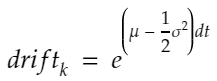  

    B. Diffusion  

Diffusion add random shocks to the simulations. There is not a clear pattern on the movement of exchange rates in real life and we need a way to include this random nature in our GBM model. Below, you can see how we express diffusion for day k. You can recall this from the example above(1. def Brownian(N)). By using standard normal random variable z and time increment dt(=1/N), we create Brownian increments(b(k) in the example). This random shock is added to the model by multiplying it with sigma and then exponentiating them together.  

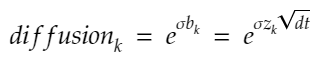  

It takes S0, mu, sigma, W and N as the input objects. We already know what N and W are from the explanation just above. Therefore, let's go over S0, mu and sigma before exploring how this function works.  
    
    1. S0:  
This is the exchange rate of yesterday. Forward simulations take their roots from this initial exchange rate value. Recall from section 3.3. that if we suppose today is (3 Aug, 2019), S0 is the exchange rate of (2 Aug, 2019). We get this value from the last record in "USDdata". 

    2. mu and sigma:  
We are simulating exchange rates for a range in future time periods. In our case, the time period is a day. Our simulations cover all the days between today and the Forward End Date(user input). Geometric Brownian Motion is a stochastic process and it assumes that the exchange rate, for a time period(day), will drift with exp((mu - 0.5sigma^2)*dt) and there will be random shock to it, which is exp(sigma * dW). So, these two parameters are the main drivers of our exchange rate simulation. 

In [ ]:
print("\n\no-o-o-o-o-o-o-o-o-o-o-o PROGRAM INITIATED o-o-o-o-o-o-o-o-o-o-o-o\n")

# Parameters

# So:     initial exchange rate
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

returns = daily_return(USDdata["USD"])

# So
So = USDdata["USD"].values[USDdata.shape[0]-1]

# N
N = pd.Series(pd.date_range(start, end)).map(lambda x: 1 if x.isoweekday() in range(1,6) else 0).sum()

# mu
mu = np.mean(returns) * N

# sigma
if implied_volatility_check:
    sigma = implied_volatility * np.sqrt(N)
    print("\nImplied Daily Volatility: ", implied_volatility)
else:
    sigma = np.std(returns) * np.sqrt(N)
    print("\nCalculated Daily Volatility: ", np.std(returns))
 
scenario_no = scen_size

gbm_scens = np.zeros((scenario_no, N + 1))

print("\n-> GBM is progressing !")
plt.figure(figsize = (20,10))
for i in range(scenario_no):
    # W
    W = Brownian(seed, N)[0]
    
    soln = GBM(So, mu, sigma, W, T, N)[0]
    
    gbm_scens[i] = soln
    plt.title("Daily Volatility: " + str(sigma / np.sqrt(N)))
    plt.plot(np.arange(1, N + 2), soln)
    plt.ylabel('USD Rate, (₺/$)')

## 6. (Bonus) Adding kernel to Jupyter notebook

In this section, we learn how to add a new kernel to Jupyter notebook and select the python.exe in our virtual environment as the interpreter, so that we can solely use the packages that we installed into the virtual environment and have a better control over our model.  

Since we are going to use a new kernel in our virtual environment, we should manually install "ipykernel" into our virtual environment. To do this, we need to open command prompt in "Scripts" folder of our virtual environment and activate it. You can refer back to Section 2 for this. After doing that, we can install "ipykernel" by typing:  
pip install ipykernel  

You can find detailed information on: https://ipython.readthedocs.io/en/stable/install/kernel_install.html

![ipy_inst.PNG](ipy_inst.PNG)  

Now, our virtual environment has the IPython backend to be used by Jupyter notebook. Next step is to add our virtual environment to Jupyter. We can add it by typing the below command:  
python -m ipykernel install --user --name env_name --display-name "Env Name"  
For env_name, you can type any name you want for your virtual environment. Display name is the name displayed on Jupyter when picking kernels.

In our case, the above command can be something like below:  
python -m ipykernel install --user --name python_venv_fxsimulator --display-name "Python_VEnv_FXsimulator"  

![ipy_jupy.PNG](ipy_jupy.PNG)  

"Installed kernelspec python_venv_fxsimulator in C:\Users\Umut YILDIZ\AppData\Roaming\jupyter\kernels\python_venv_fxsimulator"  
This statement indicates where the kernel specs are installed so that Jupyter can display it to us and we can pick it on the notebook. If you navigate to there, you see a "kernel.json" file.  

![kern_jsn.PNG](kern_jsn.PNG)  

When you open this file with a text editor, what you will see is the json text below:  

![kern_jsn_ins.PNG](kern_jsn_ins.PNG)  

You can see from the highlighted line that it is the path to the python interpreter in our virtual environment. Now, last step is to pick our virtual environment from the Jupyter notebook.  

![jupy_pick.PNG](jupy_pick.PNG)  

![kern_dsp.PNG](kern_dsp.PNG)  

That's it. We can now write our script using the virtual environment we created :)